In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from datetime import datetime as dt
import seaborn as sns

In [2]:
xl_file = pd.ExcelFile('Hackathon2018Data.xlsx')

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [3]:
df_sales = dfs['Sales']
df_sales.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost
0,2018-04-30,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484
1,2018-04-30,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884
2,2018-04-30,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394
3,2018-04-30,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330
4,2018-04-30,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994


In [4]:
df_customer = dfs['Customer']
df_customer.head()

,CustomerID,Customer,Customer Province,Age,Race,Income Bracket,Gender
0,5HMU,Assunta Wiegand,Eastern Cape,44,African,15 001 - 20 000,Female
1,2EFD,Austin Shaughnessy,Eastern Cape,98,African,15 001 - 20 000,Male
2,2DFL,Barrett Allmond,Eastern Cape,80,African,5 001 - 10 000,Male
3,5LDA,Brittney Duncan,Eastern Cape,58,African,20 001 - 25 000,Female
4,2DGE,Brook Engelman,Eastern Cape,90,African,0 - 5000,Female


In [5]:
dfs_store = dfs['Store']
dfs_store.head()

,StoreID,Latitude,Longitude
0,1,-33.919628,18.385679
1,2,-33.907630,18.408380
2,3,-34.022660,18.657900
3,4,-26.188810,28.047690
4,5,-26.196270,28.031950


In [56]:
df_kiva_1 = df_sales
df_kiva_1['Date Consolidated'] = pd.to_datetime(df_kiva_1['Date Consolidated'])
Num_Of_Loans = df_kiva_1.groupby(df_kiva_1['Date Consolidated']).size()
Total_Loan_Amount = df_kiva_1.groupby(df_kiva_1['Date Consolidated']).sum()['Amount']
Total_Lender_Count = df_kiva_1.groupby(df_kiva_1['Date Consolidated']).sum()['QTY']

df_kiva_series = pd.DataFrame({'Total_Amount': Total_Loan_Amount,'Total|_Count':Total_Lender_Count
                               ,'Num_Of_Transaction': Num_Of_Loans})
plt.show()
df_kiva_series.head()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Total_Amount,Total|_Count,Num_Of_Transaction
Date Consolidated,,,
2017-02-28,1.531140e+06,230997,11075
2017-03-31,1.717934e+06,259327,10960
2017-04-30,1.866372e+06,259628,12000
2018-02-28,1.794600e+06,224204,3668
2018-03-31,2.113678e+06,252967,3893


In [7]:
df_product =dfs['Product']
df_product.head()

,ProductID,Product Name
0,A1,HONEY - 12 OZ
1,A2,POTATOES SWEET - 20 OZ
2,A3,CRANBERRY SAUCE - 16 OZ
3,A4,POTATOES WHITE - 20 OZ
4,A5,MIXED VEGETABLES - 15 OZ


## Lets Visualize some data

In [8]:
from pandas.tools.plotting import table

In [9]:
df_customer['Total_Amount'] = 0
df_sc = df_sales.groupby('CustomerID').sum()
df_sc.head()

,Day of Transaction,StoreID,EmployeeID,Amount,QTY,Cost
CustomerID,,,,,,
2BQE,1824,252,1366,23028.8220,4368,16548.993
2BTK,1248,159,887,25802.2458,2718,19733.264
2DFL,1746,1325,8385,20078.7136,2462,9567.767
2DGE,1147,838,5376,10979.2477,1434,6826.702
2DKC,781,96,587,9235.0593,847,6685.201


In [10]:
df_sc 
mylist = list(df_customer.CustomerID.values)
for i in range(len(df_sc.index)) :
    if df_sc.index[i] in mylist:
        #print (mylist.index(df_sc.index[i]))
        df_customer['Total_Amount'].iloc[mylist.index(df_sc.index[i])]=df_sc.Amount.values[i]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  import sys


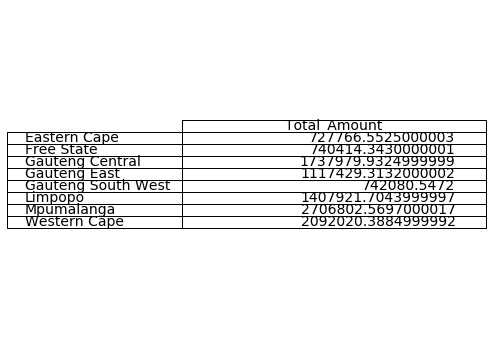

Total Amount: 11272415.351000002
Most Amount observations come from: Mpumalanga amounting to the total of 2706802.5697000017


In [11]:
df_kiva_1  = df_customer
df_kiva_country = df_kiva_1.groupby('Customer Province').sum()['Total_Amount']
plt.figure(figsize=(12,6))
# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df_kiva_country, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()
print("Total Amount: " + str(df_kiva_country.sum()))
print("Most Amount observations come from: " + df_kiva_country.idxmax()+ " amounting to the total of "+ str(df_kiva_country.max()) )

## Sales by Region

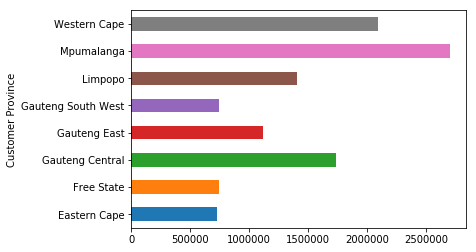

In [12]:
df_kiva_country.plot.barh()

## Profit per customer

In [13]:
df_sales['Profit'] = (df_sales.Amount.values-df_sales.Cost.values)/df_sales.QTY.values
df_sales.sort_values(by = ['Profit']).head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,Profit
56198,2018-03-31,10,14:18:46,6CBP,22,137,A53,0.0,1,0.0,0.0
42908,2018-04-30,20,11:12:42,5BUN,14,83,A259,0.0,1,0.0,0.0
6390,2017-03-31,9,09:47:31,5CHW,14,87,A1566,0.0,1,0.0,0.0
33996,2017-04-30,7,09:58:17,5LBD,15,82,A767,0.0,1,0.0,0.0
43076,2017-02-28,25,11:50:58,5BUN,14,92,A240,0.0,1,0.0,0.0


### We found a few entries with zero cost, and we decided to exclude those from our analysis

In [14]:
df_sales = df_sales[df_sales['Cost']!=0]

In [15]:
df_sales['Profit'] = (df_sales.Amount.values-df_sales.Cost.values)/df_sales.QTY.values
df_sales.sort_values(by = ['Profit']);

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
#sns.swarmplot(x="StoreID", y="Profit", data=df_sales)
#raise NotImplementedError()
#plt.show()

In [17]:
#sns.swarmplot(x="StoreID", y="Profit", data=df_sales)
#raise NotImplementedError()
plt.show()

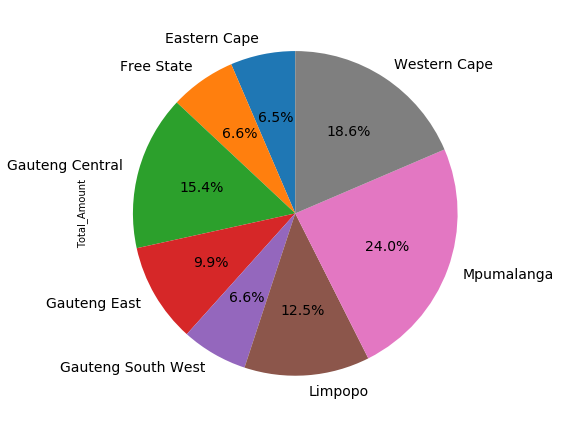

In [18]:
df_kiva_sector = df_kiva_1.groupby('Customer Province').sum()['Total_Amount']


plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

In [20]:
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

## Amount spent per ethnic group

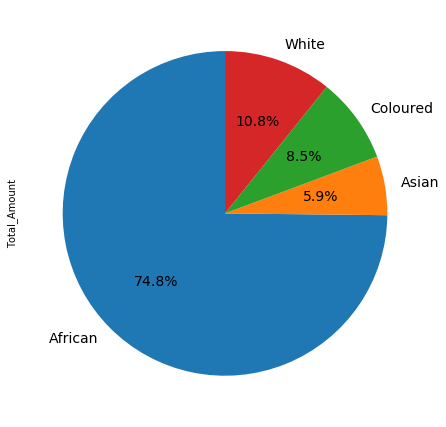

In [21]:
df_kiva_sector = df_kiva_1.groupby('Race').sum()['Total_Amount']


plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

## Amount spent per gender

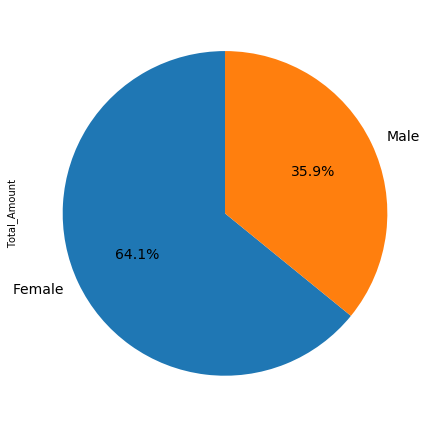

In [22]:
df_kiva_sector = df_kiva_1.groupby('Gender').sum()['Total_Amount']


plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)


## Amount spent per gender and race

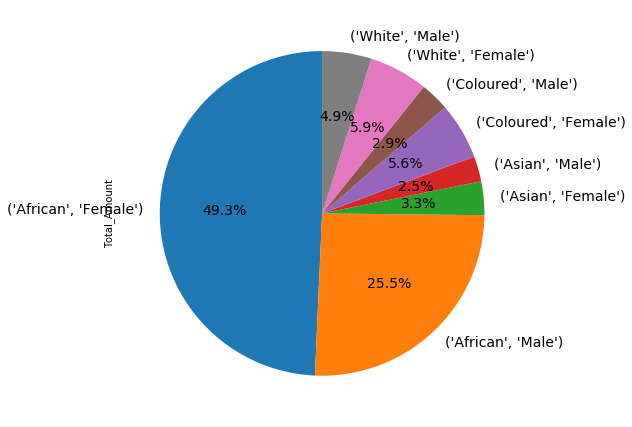

In [23]:
df_kiva_sector = df_kiva_1.groupby(['Race','Gender']).sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

In [24]:
df_sc = df_sales.groupby('StoreID').sum()[['Amount','Cost']]
index = []

for i in range(len(df_customer)):
    if df_customer.CustomerID.iloc[i] in df_sales.CustomerID.values :
        index.append(i)
        
df_sc.head()

,Amount,Cost
StoreID,,
1,684042.7624,432463.098
2,709949.2162,454757.160
3,675056.3329,425016.513
4,558012.7496,345089.286
5,514637.5258,336704.147


## Race and Income bracket

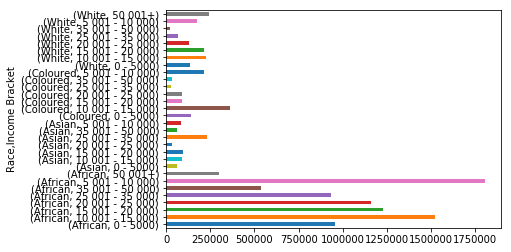

In [25]:
df_kiva_sector = df_kiva_1.groupby(['Race','Income Bracket']).sum()['Total_Amount']

df_kiva_sector.plot.barh()

In [26]:
df_kiva_sector = df_kiva_1.groupby('Gender').sum()


mylist = list(df_customer.CustomerID.values)
for i in range(len(df_sc.index)) :
    if df_sc.index[i] in mylist:
        #print (mylist.index(df_sc.index[i])
        df_customer['Total_Amount'].iloc[mylist.index(df_sc.index[i])]=df_sc.Amount.values[i]

In [27]:
df_customer.head()

,CustomerID,Customer,Customer Province,Age,Race,Income Bracket,Gender,Total_Amount
0,5HMU,Assunta Wiegand,Eastern Cape,44,African,15 001 - 20 000,Female,6603.1344
1,2EFD,Austin Shaughnessy,Eastern Cape,98,African,15 001 - 20 000,Male,10659.7965
2,2DFL,Barrett Allmond,Eastern Cape,80,African,5 001 - 10 000,Male,20078.7136
3,5LDA,Brittney Duncan,Eastern Cape,58,African,20 001 - 25 000,Female,10806.5000
4,2DGE,Brook Engelman,Eastern Cape,90,African,0 - 5000,Female,10979.2477


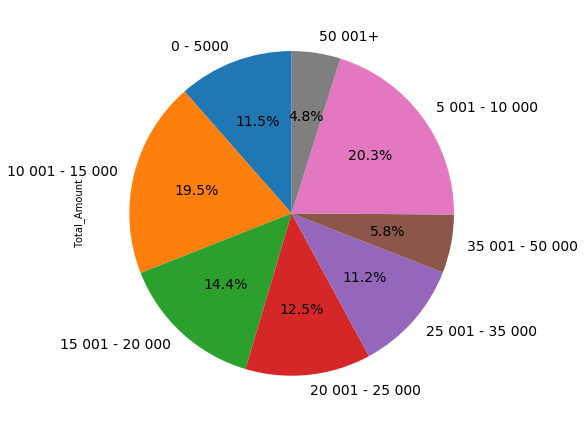

In [28]:
df_kiva_sector = df_kiva_1.groupby('Income Bracket').sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

In [29]:
age_groups= ['0-14 years','15-24 years','25-54 years','55-64 years','65 years and over']

In [30]:
df_customer.iloc[0]['Age']
df_customer['Age_Group'] = 'None'
df_customer.head();

In [31]:
for i in range(len(df_customer.index)) :
    if df_customer.iloc[i]['Age'] >0 & df_customer.iloc[0]['Age']<15:
        df_customer['Age_Group'].iloc[i] = '0-14 years'
    if df_customer.iloc[i]['Age'] >14 & df_customer.iloc[0]['Age']<25:
        df_customer['Age_Group'].iloc[i] = '15-24 years'
    if df_customer.iloc[i]['Age'] >24 & df_customer.iloc[0]['Age']<55:
        df_customer['Age_Group'].iloc[i] = '25-54 years'
    if df_customer.iloc[i]['Age'] >54 & df_customer.iloc[0]['Age']<65:
        df_customer['Age_Group'].iloc[i] = '55-64 years'
    if df_customer.iloc[i]['Age'] >64 :
        df_customer['Age_Group'].iloc[i] = '65 years and over'


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
df_customer.tail()

,CustomerID,Customer,Customer Province,Age,Race,Income Bracket,Gender,Total_Amount,Age_Group
542,2EQR,Trent Rieger,Western Cape,43,African,10 001 - 15 000,Male,41278.8802,55-64 years
543,2HKG,Ulysses Brannan,Western Cape,48,African,15 001 - 20 000,Male,16063.8103,55-64 years
544,2HMK,Valeria Phillips,Western Cape,47,African,25 001 - 35 000,Female,8194.0403,55-64 years
545,2HKW,Velma Northington,Western Cape,45,African,25 001 - 35 000,Female,12915.8542,55-64 years
546,8CWK,Werner Wieland,Western Cape,65,African,0 - 5000,Male,128604.9471,65 years and over


## Spending by age group

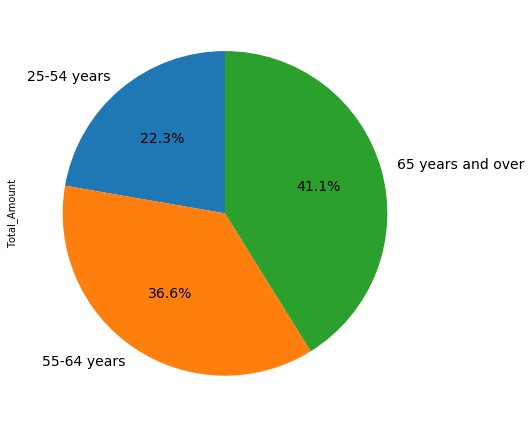

In [33]:
df_kiva_sector = df_kiva_1.groupby('Age_Group').sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

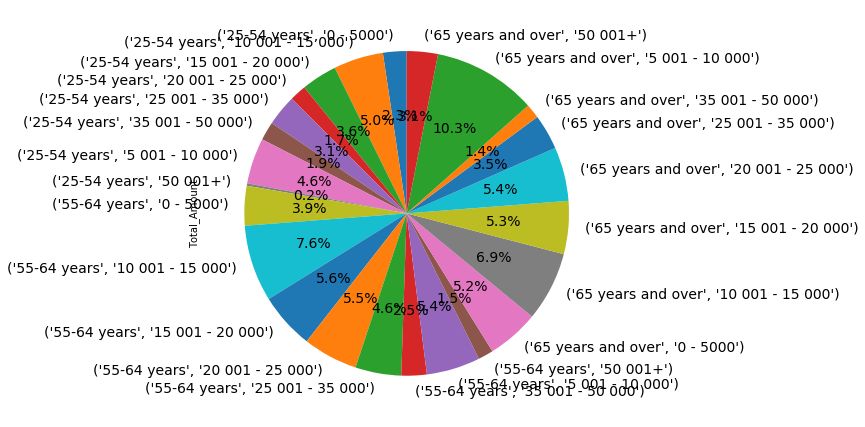

In [34]:
df_kiva_sector = df_kiva_1.groupby(['Age_Group','Income Bracket']).sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

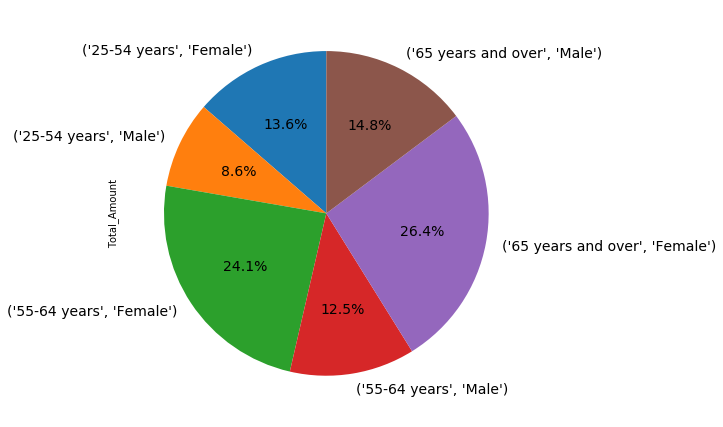

In [35]:
df_kiva_sector = df_kiva_1.groupby(['Age_Group','Gender']).sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

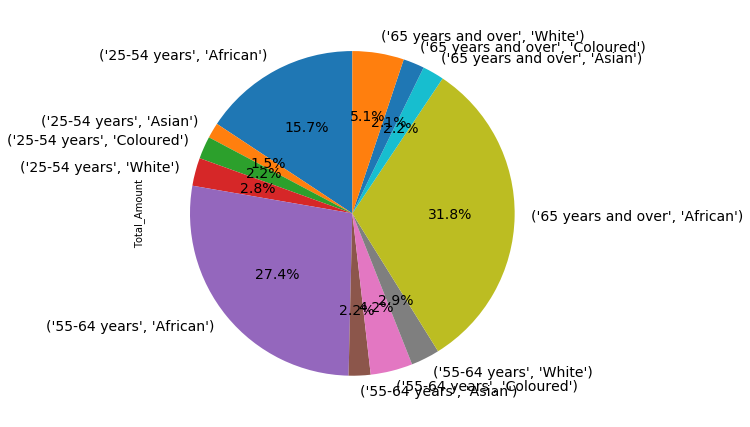

In [36]:
df_kiva_sector = df_kiva_1.groupby(['Age_Group','Race']).sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

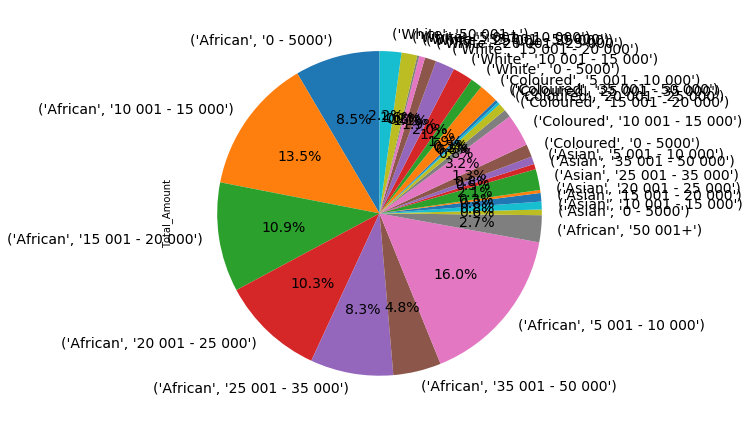

In [37]:
df_kiva_sector = df_kiva_1.groupby(['Race','Income Bracket']).sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

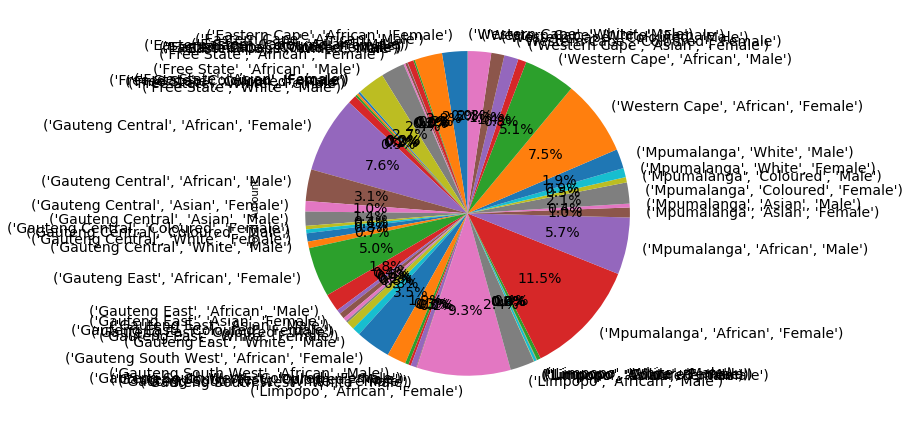

In [38]:
df_kiva_sector = df_kiva_1.groupby(['Customer Province','Race','Gender']).sum()['Total_Amount']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_kiva_sector.plot(kind='pie', y = 'Total_Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

## Most sold product. Not necessarily most profitable

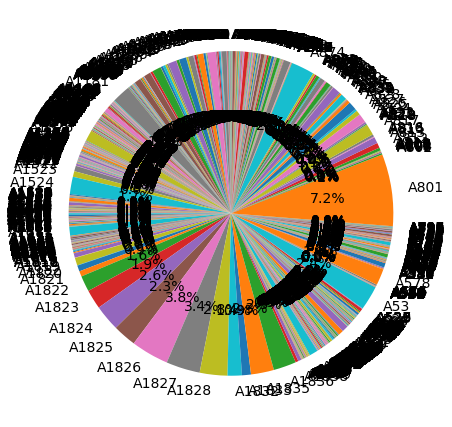

In [39]:
df_kiva_sector = df_sales.groupby('ProductID').sum()['Amount']
plt.figure(figsize=(16,30))
# plot chart
ax1 = plt.subplot(121, aspect='equal')


df_kiva_sector.plot(kind='pie', y = 'Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_kiva_sector.index, legend = False, fontsize=14)

In [40]:
df_kiva_sector = df_sales.groupby('Date Consolidated').sum()['Amount']

## Most sales realised during April (Easter month)

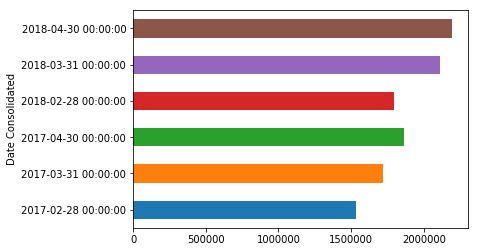

In [41]:
df_kiva_sector.plot.barh()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


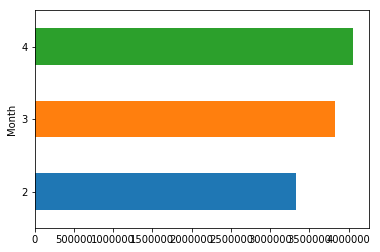

In [42]:
#Easter 
df_April = df_sales.groupby('Date Consolidated').sum()['Amount']
df_sales['Year_Month'] = pd.to_datetime(df_sales['Date Consolidated']).dt.to_period('M')
df_sales['Month'] = df_sales.Year_Month.dt.month
df_sales
df_April = df_sales.groupby('Month').sum()['Amount']
df_April.plot.barh()


In [43]:
df_April = df_sales.groupby('ProductID').sum()
df_April['PID'] = df_April.index
np.argmax(df_April.Amount.values)
print(df_April.iloc[np.argmax(df_April.Amount.values)])

Day of Transaction       7624
StoreID                  6042
EmployeeID              37758
Amount                 804311
QTY                     82394
Cost                   548825
Profit                1568.96
Month                    1588
PID                      A801
Name: A801, dtype: object


In [44]:
np.argmin(df_April.Amount.values)
print(df_April.iloc[np.argmin(df_April.Amount.values)])

Day of Transaction        1
StoreID                  18
EmployeeID              109
Amount                0.256
QTY                       1
Cost                  0.143
Profit                0.113
Month                     4
PID                   A1095
Name: A1095, dtype: object


In [47]:
#Profit per item

df_April['Profit'] = (df_April.Amount.values-df_April.Cost.values)/df_April.QTY.values
df_April
print(df_April.iloc[np.argmin(df_April.Profit.values)])

Day of Transaction           23
StoreID                       4
EmployeeID                   27
Amount                       15
QTY                           3
Cost                     14.891
Profit                0.0363333
Month                         4
PID                         A47
Name: A47, dtype: object


In [48]:
#3(a)
print(df_April.iloc[np.argmax(df_April.Profit.values)])

Day of Transaction         20
StoreID                    56
EmployeeID                362
Amount                583.225
QTY                        11
Cost                    9.525
Profit                52.1545
Month                      14
PID                      A272
Name: A272, dtype: object


## Data Analysis : Looking for trends, cylces and seasonality

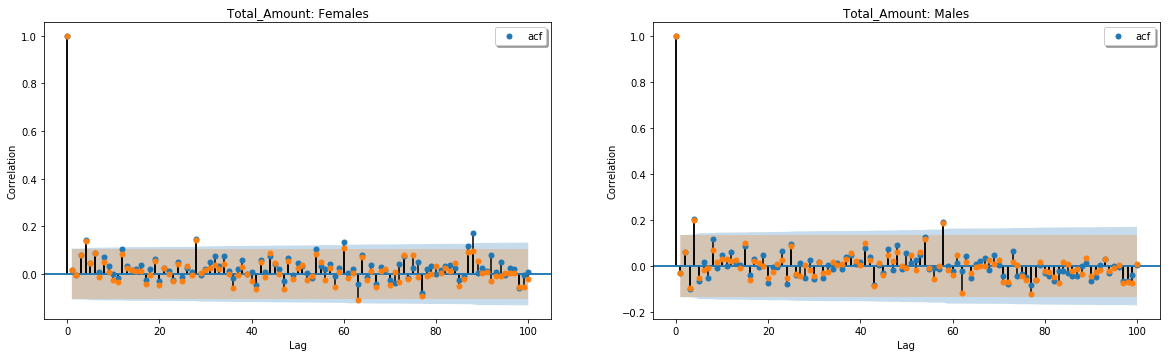

In [49]:
f = df_customer[df_customer['Gender']=='Female']
m = df_customer[df_customer['Gender']=='Male']
fig = plt.figure(figsize=[20,12])

sub1 = fig.add_subplot(221)
plot_acf(f['Total_Amount'], ax=sub1, alpha=0.05, use_vlines=True, unbiased=False, fft=False, label='acf',lags=100)
plot_pacf(f['Total_Amount'], ax=sub1, alpha=0.05, method='ywm', use_vlines=True, label='pacf',lags=100)
plt.title('Total_Amount: Females')
sub1.set_xlabel('Lag')
sub1.set_ylabel('Correlation')
handles, labels= sub1.get_legend_handles_labels()
handles=handles[:-len(handles)//3][1::2]
labels =labels[:-len(handles)//3][1::2]
sub1.legend(handles=handles, labels=labels,loc='best',shadow=True, numpoints=1)

sub2 = fig.add_subplot(222)
plot_acf(m['Total_Amount'], ax=sub2, alpha=0.05, use_vlines=True, unbiased=False, fft=False, label='acf',lags=100)
plot_pacf(m['Total_Amount'], ax=sub2, alpha=0.05, method='ywm', use_vlines=True, label='pacf',lags=100)
plt.title('Total_Amount: Males')
sub2.set_xlabel('Lag')
sub2.set_ylabel('Correlation')
handles, labels= sub2.get_legend_handles_labels()
handles=handles[:-len(handles)//3][1::2]
labels =labels[:-len(handles)//3][1::2]
sub2.legend(handles=handles, labels=labels,loc='best',shadow=True, numpoints=1)



plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


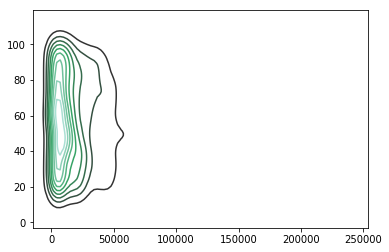

In [50]:
import seaborn as sns
kiva_sector = df_kiva_1
sns.kdeplot(kiva_sector.loc[:,['Total_Amount', 'Age']])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


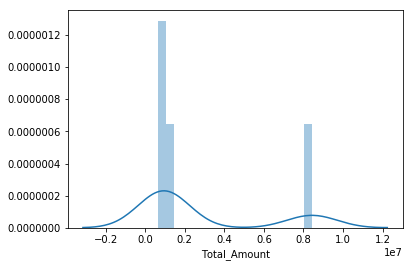

In [51]:
kiva_sector_lend = df_kiva_1.groupby(df_kiva_1['Race']).sum()['Total_Amount']
sns.distplot(kiva_sector_lend, bins=20, kde=True)
plt.show()

In [52]:
def mean(y,index):
    N = y.shape[0]
    print(N)
    y_pred = []
    indexx = []
    for i in np.arange(N)-1:
        k = np.mean(y[:i+1])
        indexx.append(index[i+1])
        y_pred.append(k)
    return pd.Series(y_pred, index=indexx)

6


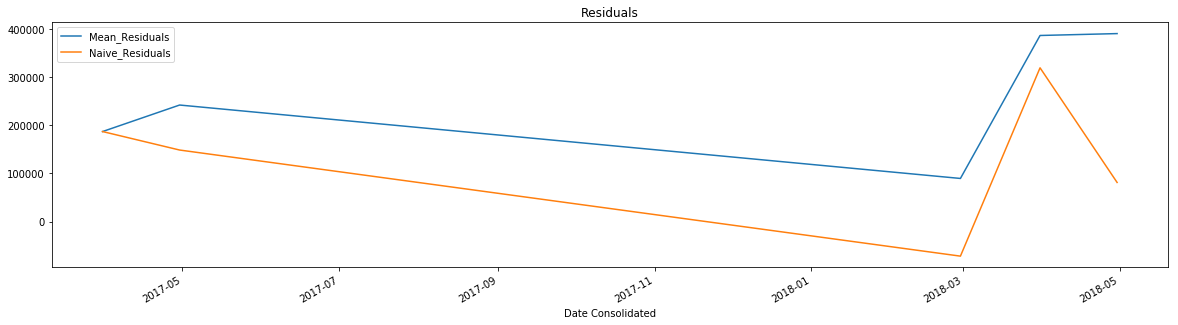

In [57]:
index =df_kiva_series.index
y_pred = mean(df_kiva_series.Total_Amount,index)
m_res = df_kiva_series.Total_Amount - y_pred
n_res =  df_kiva_series.Total_Amount-df_kiva_series.Total_Amount.shift(1)
res = pd.DataFrame({'Mean_Residuals': m_res, 'Naive_Residuals': n_res})
res.plot(title='Residuals', figsize = (20,5))
plt.show()